In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import pandas as pd
import numpy as np

from matplotlib import cm
from matplotlib.cm import viridis, plasma
from matplotlib.lines import Line2D


class Database:
    Database = None
    Cursor = None

    def Initialize():
        Database.Database = mysql.connector.connect(
            host="localhost",
            user="WSN",
            password="wsn123", 
            database='WSN8',
            auth_plugin='mysql_native_password'
        )
        
        Database.Cursor = Database.Database.cursor()

    def Execute(query):
            Database.Cursor.execute(query)
            myresult = Database.Cursor.fetchall()
            
            ret = []
            for res in myresult:
                ret.append(res)

            return ret
    
def ListOfTuplesToLists(input):
     return list(map(list, zip(*input)))

Database.Initialize()

In [65]:

simulation_types = ["FFTDMA, RRTDMA"]

def PlotRRTDMA_VS_FTTDMA_PercentageDataSentToBS_GroupBy_Mean_And_TransferTime():
    _, mtbf, tt, fttdma_pds, rrtdma_pds, __ = ListOfTuplesToLists(Database.Execute(f'''select SimulationFTTDMA.SimulationID, SimulationFTTDMA.FailureMean, SimulationFTTDMA.TransferTime, temp2.PercentageDataSent_FTTDMA, temp2.PercentageDataSent_RRTDMA, temp2.PercentageDataSent_FTTDMA / temp2.PercentageDataSent_RRTDMA
from SimulationFTTDMA
inner join 
(
select sif, (tdsf) / SimulationFTTDMA.TotalDurationToBeTransferred as PercentageDataSent_FTTDMA, avg(tdsr) / SimulationRRTDMA.TotalDurationToBeTransferred as PercentageDataSent_RRTDMA, (avg(tdsf) / sum(SimulationFTTDMA.ActualTotalDuration)) / (avg(tdsr) / sum(SimulationFTTDMA.ActualTotalDuration)) as PercentageDataSent_FTTDMAoverPercentageDataSent_RRTDMA, SimulationFTTDMA.FailureMean, SimulationFTTDMA.TotalDurationToBeTransferred from
(select SimulationID as sif, sum(TotalDataSent) as tdsf from SensorNodeFTTDMA group by SimulationID) temp3
inner join
(select SimulationID as sir, sum(TotalDataSent) as tdsr from SensorNodeRRTDMA group by SimulationID) temp4
inner join SimulationFTTDMA
inner join SimulationRRTDMA
where sif = sir and sif = SimulationFTTDMA.SimulationID and SimulationFTTDMA.SimulationID = SimulationRRTDMA.SimulationID and SimulationFTTDMA.FailureMean is not null
group by SimulationFTTDMA.SimulationID
) temp2
on SimulationFTTDMA.SimulationID = temp2.sif;
'''))
    
    columns = ['MTBF','TransferTime','FT-TDMA Data Efficiency','Round-Robin TDMA Data Efficiency']
    colors = ['r', 'g']
    #colors = [(255, 0, 0), (0, 255, 0)]
    colors = [(255, 0, 0, 0), (0, 255, 0, 0)]
    colors = ['#FF0000', '#00FF00']
    df=pd.DataFrame({'MTBF':mtbf,
              'TransferTime':tt,
              'FT-TDMA Data Efficiency':fttdma_pds,
             'Round-Robin TDMA Data Efficiency':rrtdma_pds
             },
                 columns=columns)
    

    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes(projection="3d")

    df["MTBF"] = np.log2(df["MTBF"])
    df["TransferTime"] = np.log2(df["TransferTime"])

    num_bars = 16
    num_bars_groups = 2
    x_pos = []
    y_pos = []
    x_size = np.ones(num_bars*num_bars_groups)*0.1
    y_size = np.ones(num_bars*num_bars_groups)*0.1
    c = ['FT-TDMA Data Efficiency','Round-Robin TDMA Data Efficiency']
    z_pos = []
    z_size = []
    z_color = []
    for i,col in enumerate(c):
        x_pos.append(df["MTBF"])
        y_pos.append(df["TransferTime"]+i*0.2)
        z_pos.append([0] * num_bars)
        z_size.append(df[col])
        z_color.append([colors[i]] * num_bars)
        
    x_pos = np.reshape(x_pos,(num_bars*num_bars_groups,))
    y_pos = np.reshape(y_pos,(num_bars*num_bars_groups,))
    z_pos = np.reshape(z_pos,(num_bars*num_bars_groups,))
    z_size = np.reshape(z_size,(num_bars*num_bars_groups,))
    z_color = np.reshape(z_color,(num_bars*num_bars_groups,))

    ax.bar3d(x_pos, y_pos, z_pos, x_size, y_size, z_size, color=z_color)

    plt.xlabel('MTBF')
    plt.ylabel('TransferTime')
    ax.set_zlabel('Data Efficiency')

    #plt.xticks(range(len(np.unique(df["MTBF"]))), np.power(np.unique(df["MTBF"]), 2))
    #plt.yticks(range(len(tt)), np.power(df["TransferTime"], 2))
    #ax.set_xlim(30, 70)


    legend_elements = [Line2D([0], [0], marker='o', color='w', label='A',markerfacecolor='r', markersize=10),
                    Line2D([0], [0], marker='o', color='w', label='B',markerfacecolor='g', markersize=10),
                    Line2D([0], [0], marker='o', color='w', label='C',markerfacecolor='b', markersize=10)
                    ]
                    
    # Make legend
    ax.legend(handles=legend_elements, loc='best')
    # Set view
    ax.view_init(elev=35., azim=35)
    plt.show()


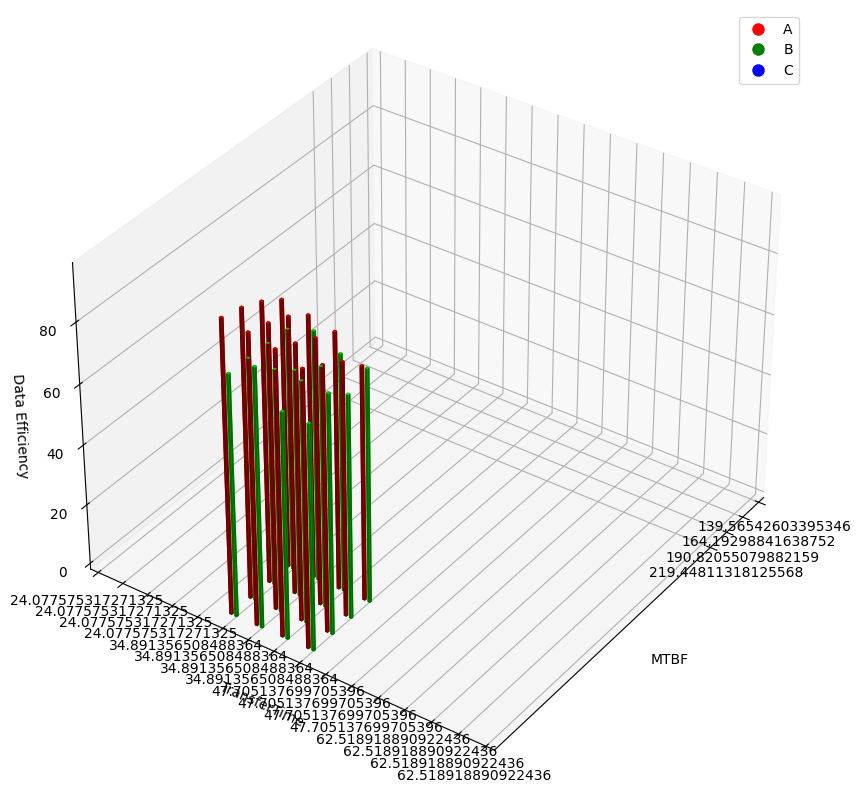

In [66]:
PlotRRTDMA_VS_FTTDMA_PercentageDataSentToBS_GroupBy_Mean_And_TransferTime()

In [ ]:
    PlotWSN(1)

ProgrammingError: 1146 (42S02): Table 'wsn4.sensornode' doesn't exist

In [ ]:
#PlotCorrelationCWSN_MTBF()

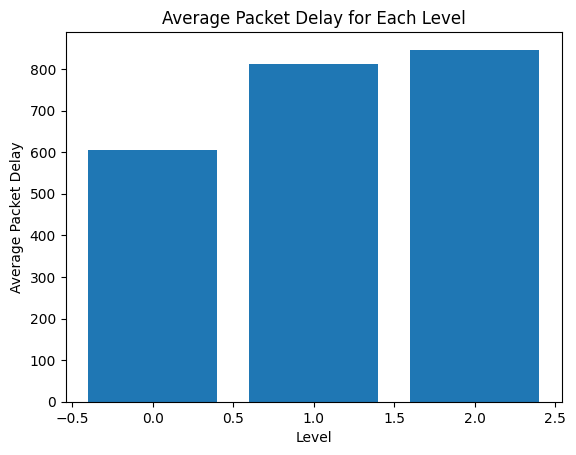

In [ ]:
PlotDelay_Level()

                DeltaOpt  EnergyConsumed
DeltaOpt        1.000000       -0.261988
EnergyConsumed -0.261988        1.000000


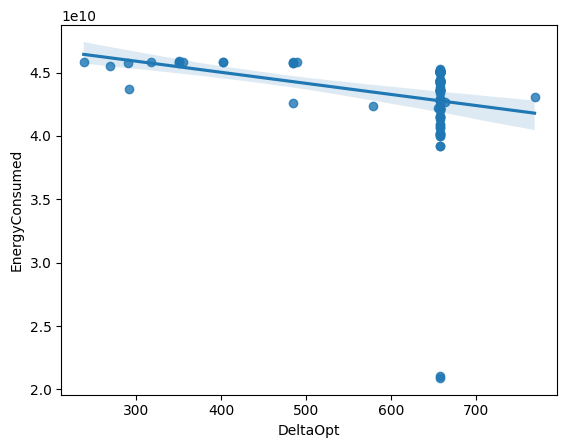

In [ ]:
PlotCorrelationEnergyConsumed_DeltaOpt()

                DeltaOpt  CollectionTime
DeltaOpt        1.000000        0.225677
CollectionTime  0.225677        1.000000


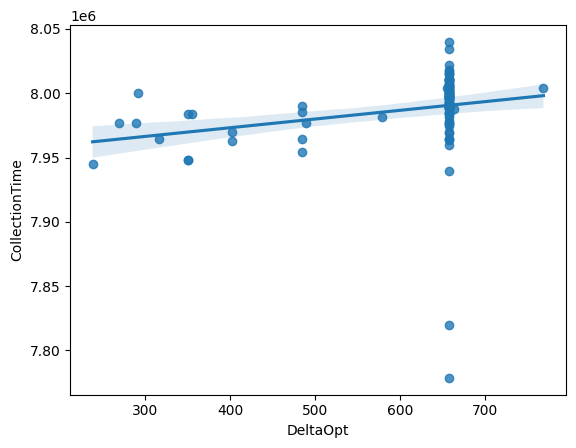

In [ ]:
PlotCorrelationCollectionTime_DeltaOpt()

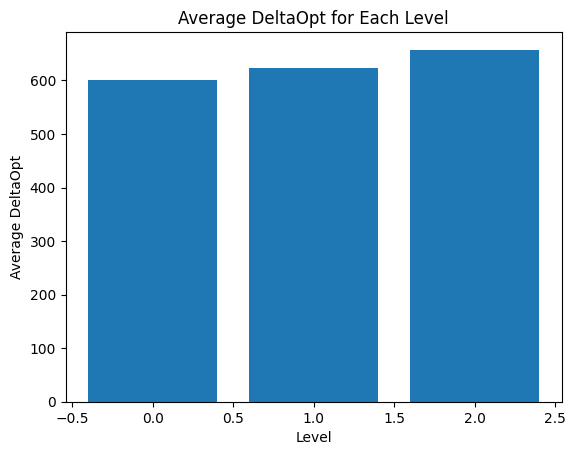

In [ ]:
PlotDeltaOpt_Level()

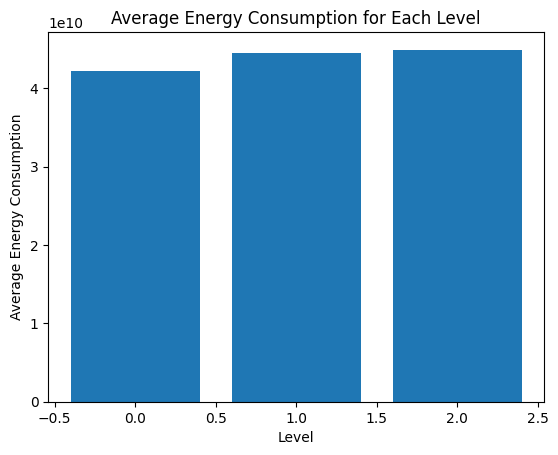

In [ ]:
PlotEnergy_Level()

                                                    TotalDurationToBeTransferred / ActualTotalDuration  \
TotalDurationToBeTransferred / ActualTotalDuration                                                NaN    
CWSNEfficiency                                                                                    NaN    

                                                    CWSNEfficiency  
TotalDurationToBeTransferred / ActualTotalDuration             NaN  
CWSNEfficiency                                                 NaN  


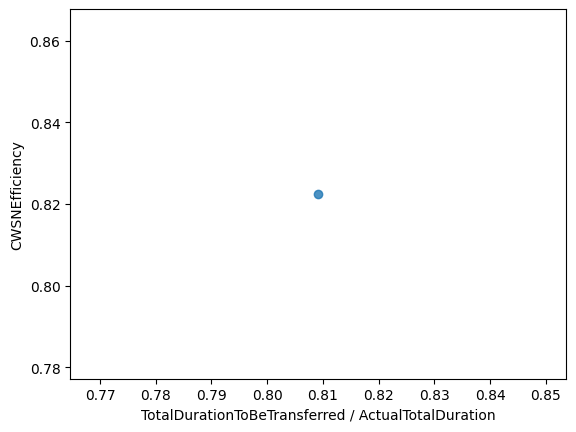

In [ ]:
PlotCorrelationCollectionTotalTime_CWSN()

[9610140.0]


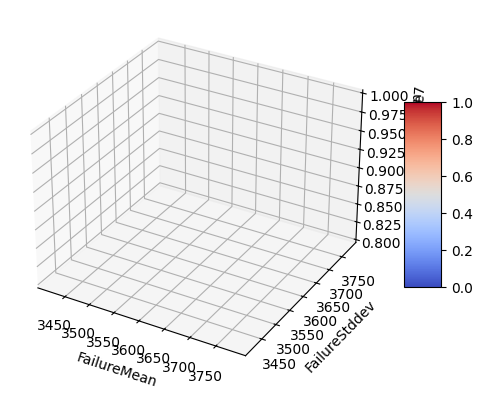

In [ ]:
PlotCorrelationATD_MTBF()

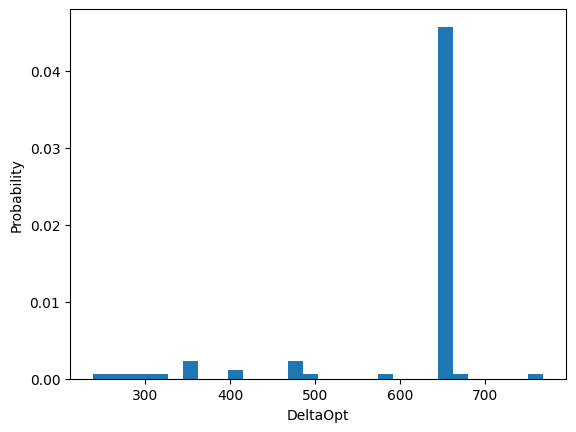

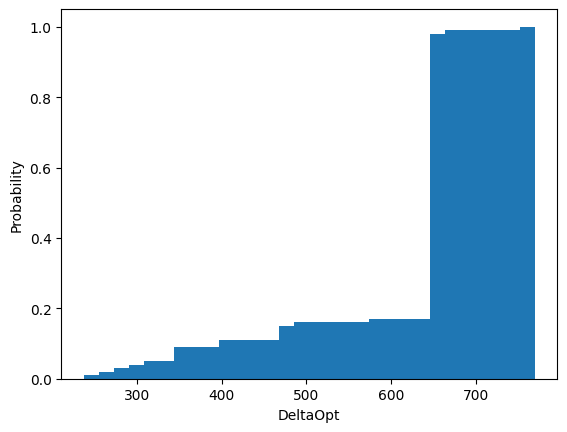

In [ ]:
PlotDeltaOptDistribution()

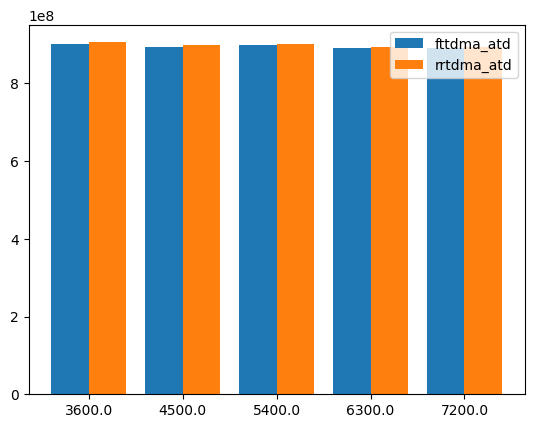

In [ ]:
PlotRRTDMA_VS_FTTDMA_ActualTotalDuration_GroupBy_Mean()

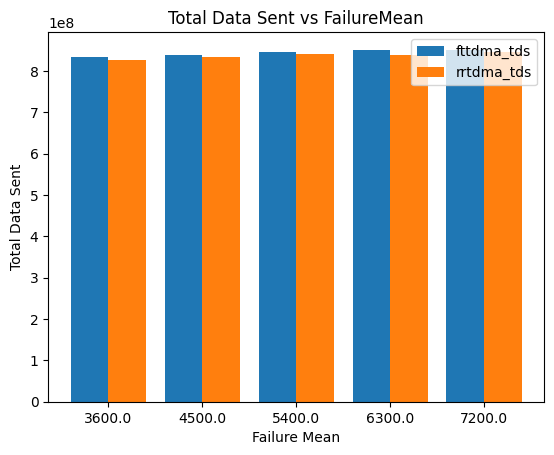

In [ ]:
PlotRRTDMA_VS_FTTDMA_TotalDataSentToBS_GroupBy_Mean()

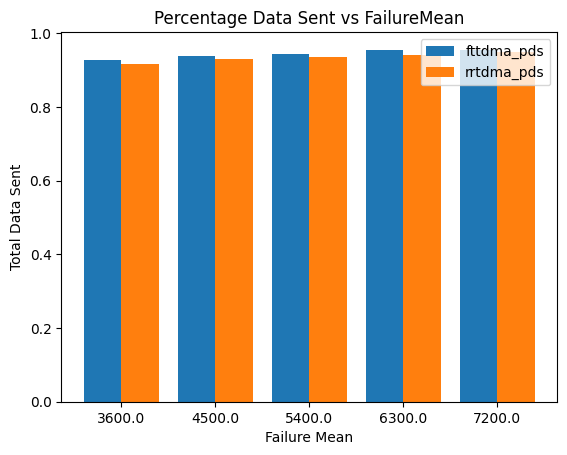

In [ ]:
PlotRRTDMA_VS_FTTDMA_PercentageDataSentToBS_GroupBy_Mean()